In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from toydata import X_DIM, POS, next_batch
from attention import atn, n

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, X_DIM], name='x')
x_atn = atn(x)
x_class = tf.nn.sigmoid(n(x_atn))

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'atn_model/model.ckpt')

INFO:tensorflow:Restoring parameters from atn_model/model.ckpt


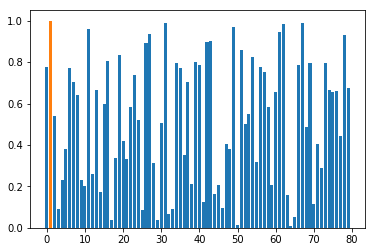

In [23]:
x_sample, _ = next_batch(1, X_DIM, POS)
x_sample_atn = sess.run(x_atn, {x: x_sample})

bar_edges = np.arange(0, X_DIM)
plt.bar(bar_edges, x_sample.flatten())
plt.bar(bar_edges, x_sample_atn.flatten())
plt.show()

In [25]:
#' '.join([str(int(v*100)) for v in x_sample_atn.flatten()])

In [26]:
tf.trainable_variables()

[<tf.Variable 'n_atn/kernel:0' shape=(80, 80) dtype=float32_ref>,
 <tf.Variable 'n_atn/bias:0' shape=(80,) dtype=float32_ref>,
 <tf.Variable 'n_logits/kernel:0' shape=(80, 1) dtype=float32_ref>,
 <tf.Variable 'n_logits/bias:0' shape=(1,) dtype=float32_ref>]

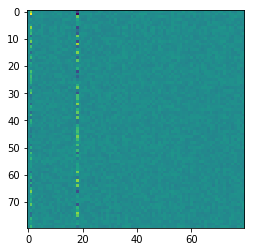

In [31]:
with tf.variable_scope('n_atn', reuse=tf.AUTO_REUSE):
    w = sess.run(tf.get_variable('kernel', [80, 80]))

plt.imshow(w)
plt.show()

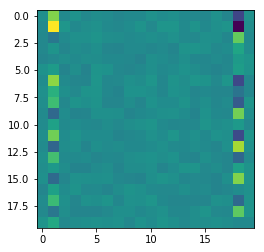

In [32]:
# show near 1, 1 point
plt.imshow(w[:20, :20])
plt.show()